<a href="https://colab.research.google.com/github/syedmohsindaniyalhaider/analytics-vidiya-tweets-EDA/blob/main/analytic_vidiya_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
#Import list of stopwards
from wordcloud import STOPWORDS

In [10]:
dataset = pd.read_csv('/content/tweets.csv', encoding = 'ISO-8859-1')
dataset.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [16]:
# dataset['text']
dataset.text

0        RT @rssurjewala: Critical question: Was PayTM ...
1        RT @Hemant_80: Did you vote on #Demonetization...
2        RT @roshankar: Former FinSec, RBI Dy Governor,...
3        RT @ANI_news: Gurugram (Haryana): Post office ...
4        RT @satishacharya: Reddy Wedding! @mail_today ...
                               ...                        
14935    RT @saxenavishakha: Ghost of demonetization re...
14936    N d modi fans-d true nationalists of the count...
14937    RT @bharat_builder: Lol. Demonetization has fi...
14938    RT @Stupidosaur: @Vidyut B team of BJP. CIA ba...
14939    @Vidyut B team of BJP. CIA baby. CCTV, EVM but...
Name: text, Length: 14940, dtype: object

In [19]:
def gen_freq(text):
  word_list = []

  for words in text.split():
    word_list.extend(words)

  word_freq = pd.Series(word_list).value_counts()

  word_freq[:20]

  return word_freq

In [30]:
word_freq = gen_freq(dataset.text.str)

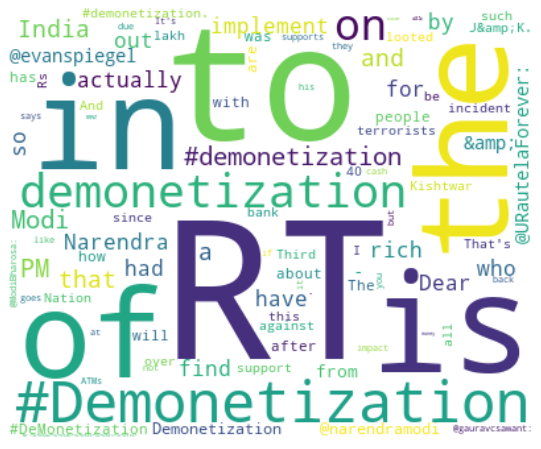

In [34]:
wc = WordCloud(width=400, height=330, max_words = 100, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [72]:
def clean_text(text):
  #remove RT
  text = re.sub('RT','', text)
  #fix &
  text = re.sub('&amp','', text)
  #remove punctuation
  text = re.sub(r'[?!.;:,#@-]','',text)
  #remove <...> words
  text = re.sub(r'<(.*?)>','',text)
  #remove https
  text = re.sub(r'\D{5}/{2}(.*?)','',text)
  #remove % signs
  text = re.sub(r'\d*%','',text)
  #convert to lower case to maintain consistency
  text = text.lower()
  return text

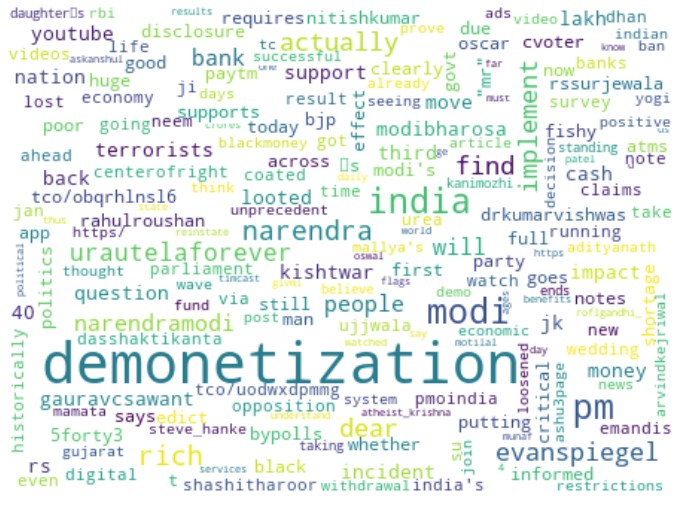

In [73]:
text = dataset.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

wc = WordCloud(width=450, height=330, max_words = 200, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()